**Задание**

Выбор датасета:

Четный номер в группе - Датасет [о вине](https://www.kaggle.com/datasets/davorbudimir/winedataset)

Нечетный номер в группе - Датасет [про обезьян](https://www.kaggle.com/datasets/slothkong/10-monkey-species)

- Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.
  执行数据预处理，包括缺失值处理、分类特征编码和缩放。
- Реализуйте метод k-ближайших соседей без использования сторонних библиотек, кроме NumPy и Pandas.
  实现k近邻方法，不使用NumPy和Pandas以外的第三方库。
- Постройте две модели k-NN с различными наборами признаков:
  构建两个具有不同特征集的 k-NN 模型：
    - Модель 1: Признаки случайно отбираются.
      模型1：特征是随机选择的。
    - Модель 2: Фиксированный набор признаков, который выбирается заранее.
      模型2：预先选择的一组固定特征。
- Для каждой модели проведите оценку на тестовом наборе данных при разных значениях k. Выберите несколько различных значений k, например, k=3, k=5, k=10, и т. д. Постройте матрицу ошибок.
  对于每个模型，在不同的 k 值下对测试数据集进行评估。 选择k的几个不同值，例如k=3、k=5、k=10等。构造误差矩阵。

# 10 Monkey Species

## About Dataset


These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
这些数据是对意大利同一地区种植但来自三个不同品种的葡萄酒进行化学分析的结果。 分析确定了三种葡萄酒中每种葡萄酒中 13 种成分的含量。

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set.
我认为初始数据集大约有 30 个变量，但由于某种原因我只有 13 维版本。 我有一个大约 30 个变量的列表，但是 a.) 我丢失了它，b.) 我不知道该集合中包含哪 13 个变量。

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.
在分类上下文中，这是一个具有“行为良好”类结构的适定问题。 对于新分类器的首次测试来说这是一个很好的数据集，但不是很有挑战性。

## 1 Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
## 获取并可视化数据集的统计数据（包括计数、平均值、标准差、最小值、最大值和各种分位数）。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read dataset from csv file
data = pd.read_csv("./WineDataset.csv")

In [4]:
# show top 10 rows
data.head(5)

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [5]:
# show column data type and data range
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic Acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  Wine 

In [6]:
# show info of numeric values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


## 2 Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.
## 执行数据预处理，包括处理缺失值、分类特征编码和标准化。

In [40]:
# check if there is missing value in each column
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

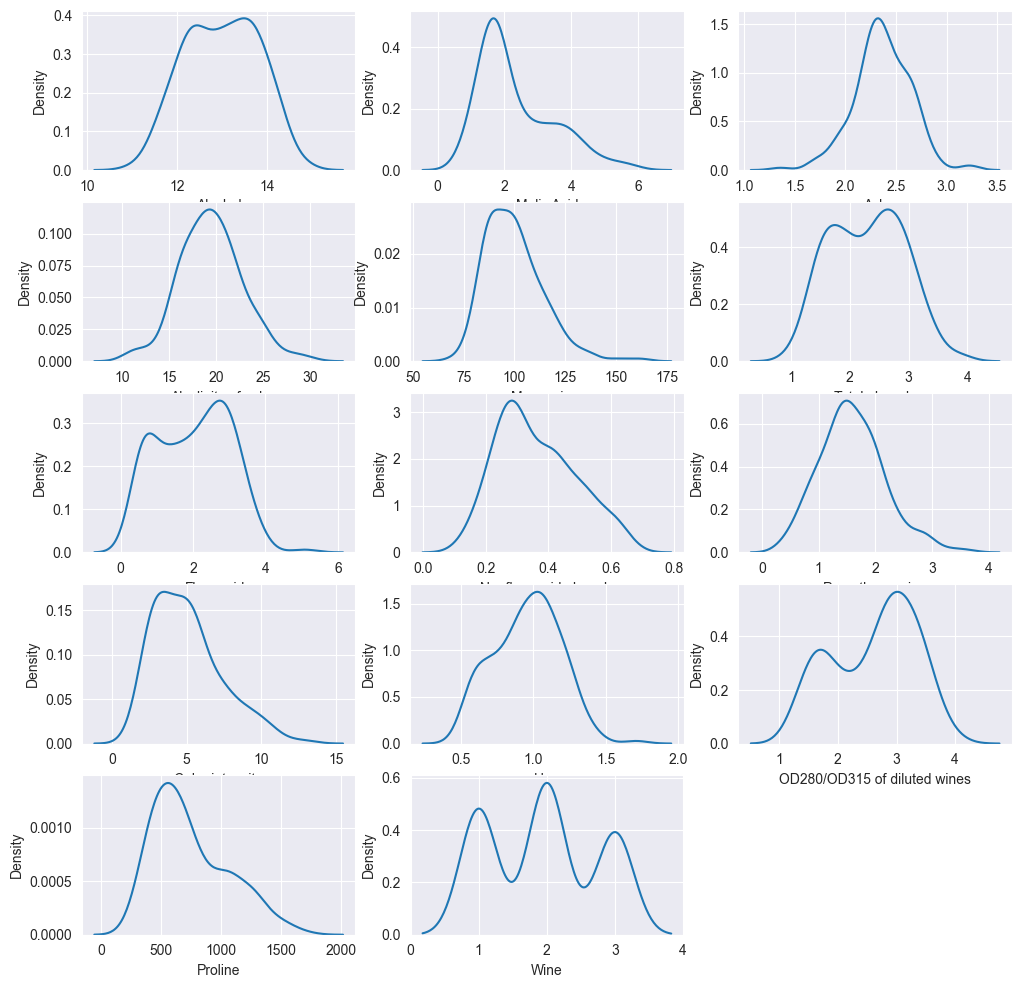

In [12]:
## Checking Normal distribution of data
plt.figure(figsize=(12,12))
i=1
for col in data.columns:
    plt.subplot(5,3,i)
    sns.kdeplot(data[col])
    i+=1

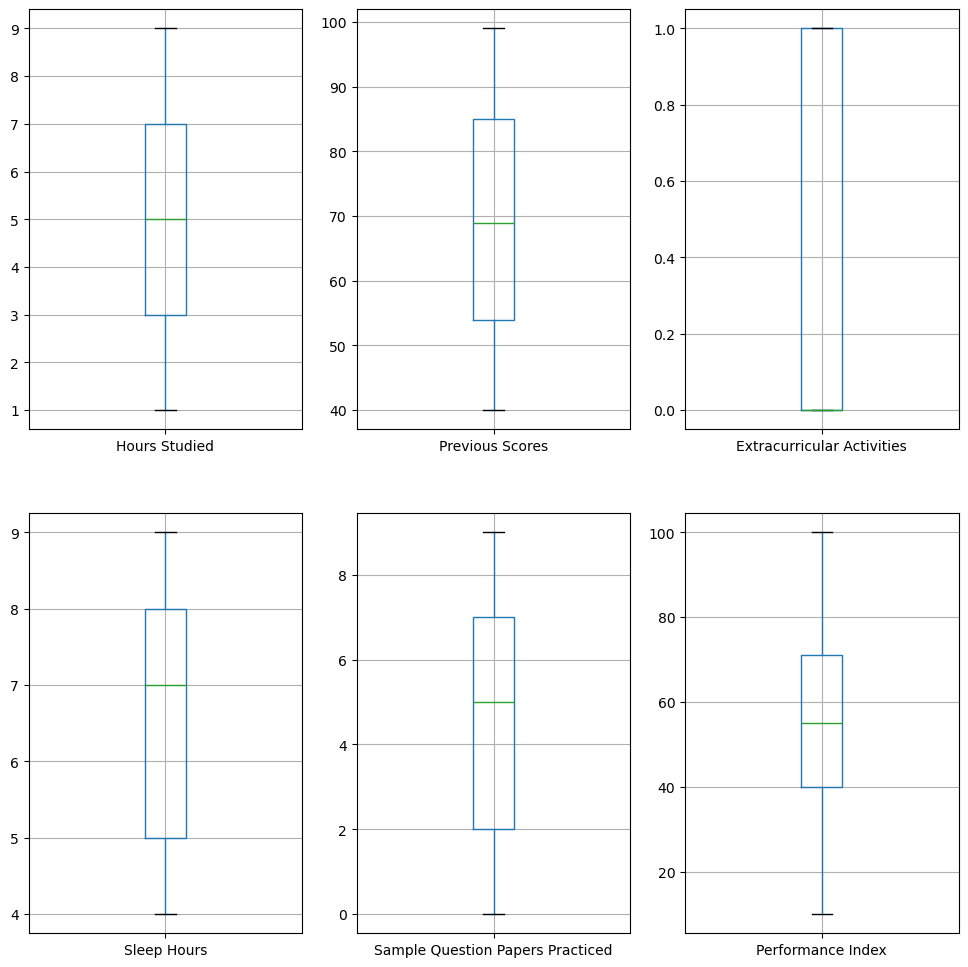

In [45]:
## Checking outliers
plt.figure(figsize=(12,12))
i=1
for col in data.columns:
    plt.subplot(2,3,i)
    data[[col]].boxplot()
    i+=1

In [46]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

                                  Hours Studied  Previous Scores  \
Hours Studied                          1.000000        -0.012390   
Previous Scores                       -0.012390         1.000000   
Extracurricular Activities             0.003873         0.008369   
Sleep Hours                            0.001245         0.005944   
Sample Question Papers Practiced       0.017463         0.007888   
Performance Index                      0.373730         0.915189   

                                  Extracurricular Activities  Sleep Hours  \
Hours Studied                                       0.003873     0.001245   
Previous Scores                                     0.008369     0.005944   
Extracurricular Activities                          1.000000    -0.023284   
Sleep Hours                                        -0.023284     1.000000   
Sample Question Papers Practiced                    0.013103     0.003990   
Performance Index                                   0.024525 

<Axes: >

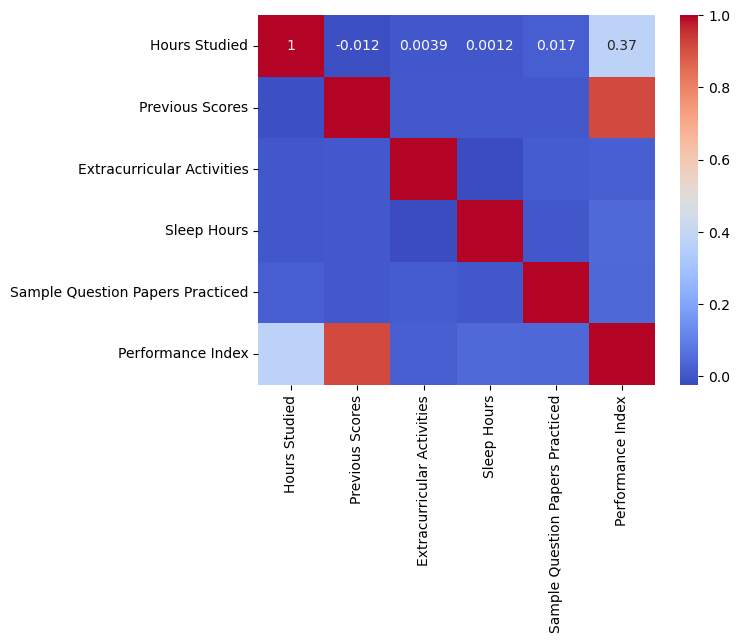

In [56]:
corellation = data.corr()
print(corellation)

sns.heatmap(corellation,annot=True,cmap='coolwarm')

In [48]:
data_std = (data - data.mean()) / data.std()  # Z-score standardize
data_std['Performance Index'] = data['Performance Index']

In [49]:
data_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,1.477929e-16,1.000000,-1.542072,-0.769665,0.002742,0.775149,1.547556
Previous Scores,10000.0,-1.303846e-16,1.000000,-1.697829,-0.890594,-0.025699,0.896855,1.704090
Extracurricular Activities,10000.0,-5.115908e-17,1.000000,-0.989604,-0.989604,-0.989604,1.010404,1.010404
Sleep Hours,10000.0,1.314504e-16,1.000000,-1.492220,-0.902549,0.276791,0.866462,1.456132
Sample Question Papers Practiced,10000.0,-1.122658e-16,1.000000,-1.598446,-0.900937,0.145326,0.842835,1.540343
Performance Index,10000.0,5.522480e+01,19.212558,10.000000,40.000000,55.000000,71.000000,100.000000


/Users/2398768715qq.com/.conda/envs/Lab4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/2398768715qq.com/.conda/envs/Lab4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/2398768715qq.com/.conda/envs/Lab4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/2398768715qq.com/.conda/envs/Lab4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

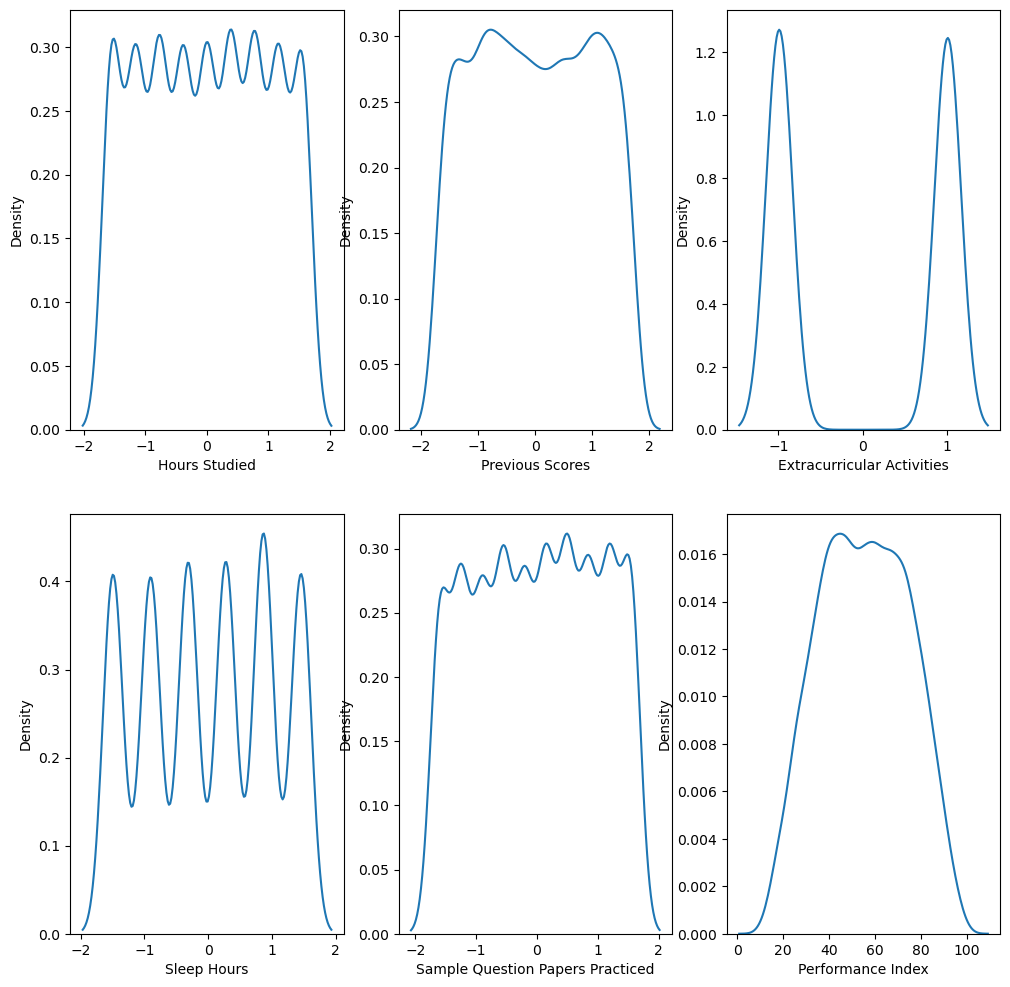

In [50]:
## Checking Normal distribution of data
plt.figure(figsize=(12,12))
i=1
for col in data.columns:
    plt.subplot(2,3,i)
    sns.kdeplot(data_std[col])
    i+=1

## 3 Разделите данные на обучающий и тестовый наборы данных.
## 将数据分为训练数据集和测试数据集。

In [51]:
from sklearn.model_selection import train_test_split
train_data, test_data =train_test_split(data_std, test_size=0.2, random_state=42)

x_train = train_data.drop('Performance Index', axis=1)
y_train = train_data['Performance Index']
x_test = test_data.drop('Performance Index', axis=1)
y_test = test_data['Performance Index']

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 5)
(2000, 5)
(8000,)
(2000,)


In [52]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # 添加偏置项
        self.coefficients = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.coefficients)

In [53]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

model2 = LinearRegression()
model2.fit(x_train['Previous Scores'], y_train)

model3 = LinearRegression()
model3.fit(x_train['Hours Studied'], y_train)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [54]:
from sklearn.metrics import r2_score

def evaluate_model(X, y, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    predictions = X_b.dot(theta)
    r2 = r2_score(y, predictions)
    return r2


r2_model1 = evaluate_model(x_test, y_test, model1.coefficients)
r2_model2 = evaluate_model(x_test['Previous Scores'], y_test, model2.coefficients)
r2_model3 = evaluate_model(x_test['Hours Studied'], y_test, model3.coefficients)

/Users/2398768715qq.com/.conda/envs/Lab4/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/2398768715qq.com/.conda/envs/Lab4/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/2398768715qq.com/.conda/envs/Lab4/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/2398768715qq.com/.conda/envs/Lab4/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

In [55]:
print("R^2 score of module 1:", r2_model1)
print("R^2 score of module 2:", r2_model2)
print("R^2 score of module 2:", r2_model3)

R^2 score of module 1: 0.9889832909573144
R^2 score of module 2: 0.8409297694265205
R^2 score of module 2: 0.13160425385996832
